In [17]:
from sklearn.datasets import load_boston #보스턴 데이터 모듈
from sklearn.linear_model import LinearRegression #선형회귀를 위한 모듈
import pandas as pd #dataframe 활용위한 함수
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
boston = load_boston() #보스턴 하우스 주택데이터 로드
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target #집값을 목표변수로 설정
print(df.shape) #데이터 사이즈 갯수
df.head(2)

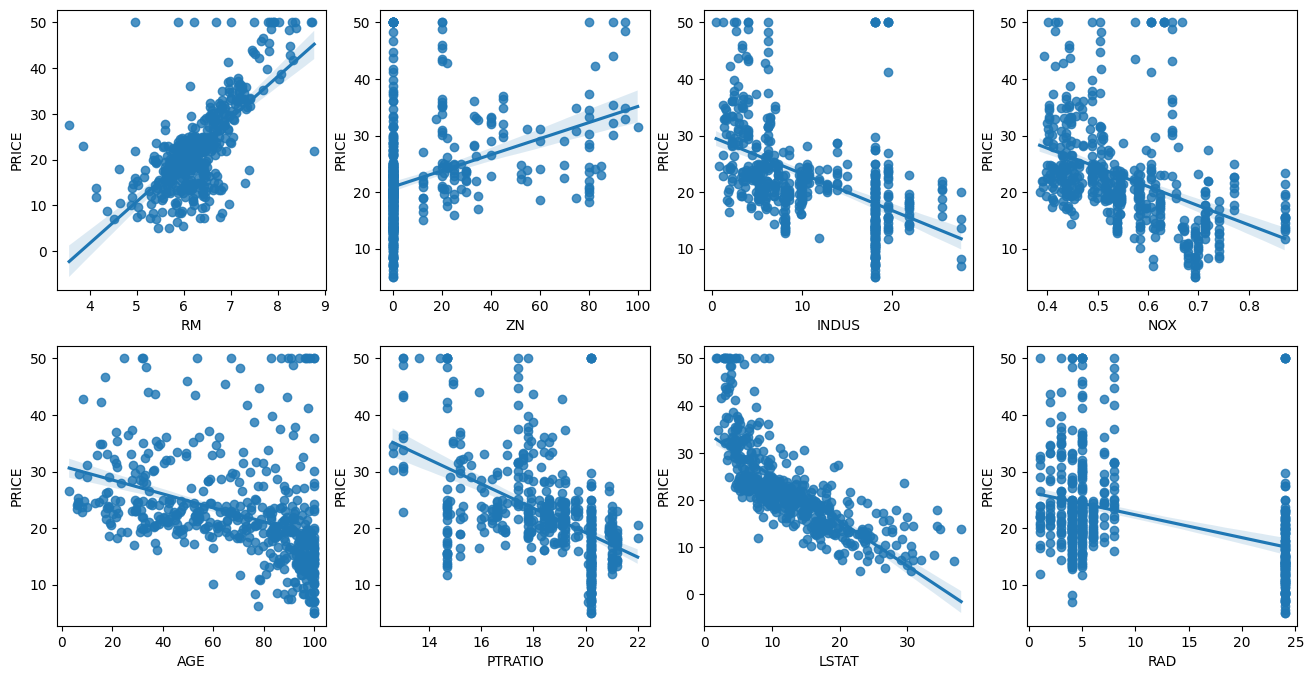

In [ ]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
#각 독립변수별 회귀 직선을 그린 그림
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4    
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [13]:
y_target = df['PRICE']
x_data = df.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

In [14]:
#선형회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression()
print(X_train.shape, X_test.shape)

(354, 13) (152, 13)


In [16]:
y_preds = lr.predict(X_test)
print(y_preds[0:10])

[23.15424087 19.65590246 36.42005168 19.96705124 32.40150641 17.66341192
 30.32844101 17.8513932  10.86187069 12.83177966]


In [19]:
print("절편 값:", lr.intercept_)
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 40.995595172164435
회귀계수: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [20]:
#회귀계수 내림차순 정렬
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64